In [1]:
import xarray as xr
from xclim.core.calendar import percentile_doy

In [2]:
from dask.distributed import Client

client = Client(n_workers=8, threads_per_worker=4)

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/g300046/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/g300046/levante-spawner-preset//proxy/8787/status,Workers: 8
Total threads: 32,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44563,Workers: 8
Dashboard: /user/g300046/levante-spawner-preset//proxy/8787/status,Total threads: 32
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:33069,Total threads: 4
Dashboard: /user/g300046/levante-spawner-preset//proxy/34657/status,Memory: 12.50 GiB
Nanny: tcp://127.0.0.1:33171,


In [4]:
url = "/work/ch0636/eddy/pool/sims/cordex/euro-cordex/esgf/EUR11/day/var/pr/pr_EUR-11_NOAA-GFDL-GFDL-ESM2G_rcp26_r1i1p1_GERICS-REMO2015_v1_day_19480102-21001231.nc"
ds = xr.open_dataset(url, chunks={"time": 365, "rlon": 230, "rlat": 220})
pr = ds.pr.sel(time=slice("1970", "2000"))
pr

<xarray.DataArray 'pr' (time: 11323, rlat: 412, rlon: 424)>
dask.array<getitem, shape=(11323, 412, 424), dtype=float32, chunksize=(365, 220, 230), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 2000-12-31T12:00:00
    lon      (rlat, rlon) float32 dask.array<chunksize=(220, 230), meta=np.ndarray>
    lat      (rlat, rlon) float32 dask.array<chunksize=(220, 230), meta=np.ndarray>
  * rlon     (rlon) float64 -28.38 -28.27 -28.16 -28.05 ... 17.93 18.04 18.16
  * rlat     (rlat) float64 -23.38 -23.27 -23.16 -23.05 ... 21.61 21.72 21.84
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    units:             kg m-2 s-1
    grid_mapping:      rotated_latitude_longitude
    comment:           at surface; includes both liquid and solid phases from...
    cell_methods:      time: mean
    associated_files:  gridspecFile: gridspec_atmos_fx_GERICS-REMO2015_histor...

In [5]:
import dask

with dask.config.set(**{"array.slicing.split_large_chunks": False}):
    doy = percentile_doy(pr, per=95)

In [6]:
%time doy_ = doy.compute()

CPU times: user 17.7 s, sys: 2.43 s, total: 20.1 s
Wall time: 1min 13s


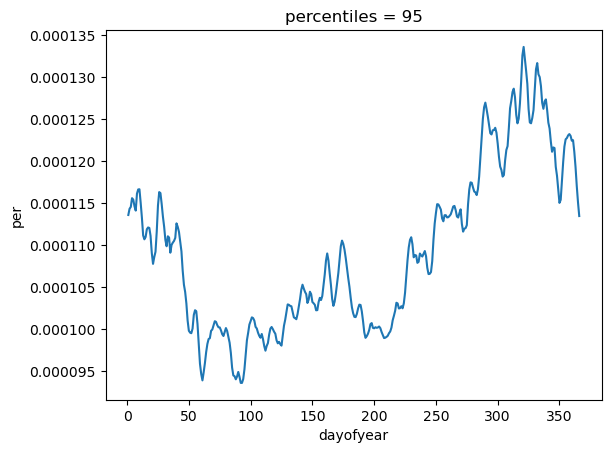

In [7]:
doy_.mean(("rlon", "rlat")).plot()